# Section 1: The Magic of Entanglement – Bell State Creation

**Objective:** In this section, we will intuitively understand what entanglement is and build a fundamental entangled quantum circuit, known as a Bell state.

---

### Key Concepts:

* **What is Entanglement?** Imagine two quantum particles that become intrinsically linked, no matter how far apart they are. Measuring the property of one instantaneously tells you about the property of the other. Einstein famously called this "spooky action at a distance." It's like having two coins that, when flipped, *always* land on the same side, even if you flip them light-years apart, without any prior agreement.
* **Why is Entanglement Important?** This unique quantum correlation is a fundamental resource. It's crucial for:
    * **Quantum Communication:** Enabling ultra-secure communication through Quantum Key Distribution (QKD).
    * **Quantum Teleportation:** Transferring quantum information from one location to another.
    * **Quantum Computation:** Speeding up certain computations by creating complex relationships between qubits.

---

### Building a Bell State Circuit (Intuitive Walkthrough)

We will now construct the simplest entangled state, often called a **Bell state** (specifically, the $\Phi^+$ Bell state). It involves just two qubits. Here's the recipe:

1.  **Start with Two Qubits at $|0\rangle$:** Our quantum circuit will begin with two qubits, both initialized in the $|0\rangle$ state.
2.  **Apply a Hadamard Gate (H) to Qubit 0:** This gate puts Qubit 0 into a superposition, meaning it's simultaneously $|0\rangle$ and $|1\rangle$ with equal probability. (Remember the coin spinning in the air?).
3.  **Apply a Controlled-NOT (CNOT) Gate:** This is the magic gate for entanglement! It uses Qubit 0 (the one in superposition) as the 'control' and Qubit 1 as the 'target'.
    * If Qubit 0 is $|0\rangle$, Qubit 1 remains unchanged.
    * If Qubit 0 is $|1\rangle$, Qubit 1 *flips* (from $|0\rangle$ to $|1\rangle$).
    * Because Qubit 0 is in superposition, this CNOT gate effectively links the two qubits' fates, creating entanglement.
4.  **Measure Both Qubits:** We'll then measure both qubits. If they are truly entangled, we should only see outcomes where both qubits are the same (00 or 11), never different (01 or 10).

### Implementation: Creating and Simulating the Bell State

Let's put this into action with Qiskit.

Bell State Circuit Diagram (Graphical):


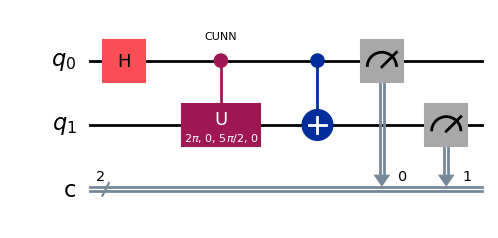


Measurement Counts (should primarily show '00' and '11'):
{'00': 514, '11': 510}


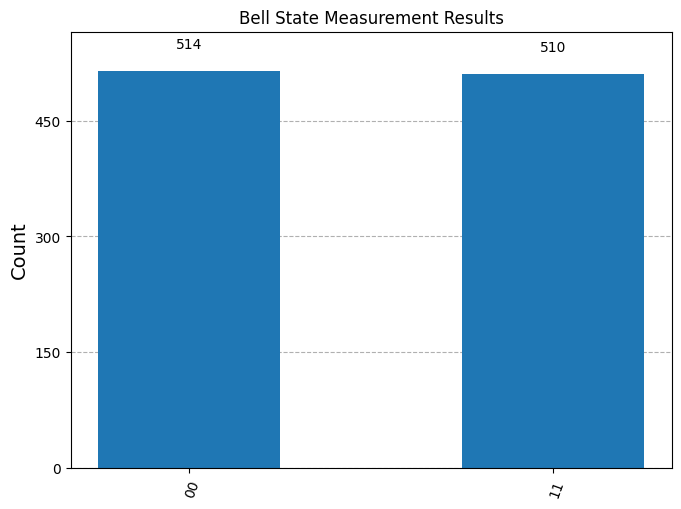


Notice how the outcomes are predominantly '00' and '11', with very few or no '01' or '10' results. This is the signature of entanglement!


In [45]:
%matplotlib inline
# Import necessary Qiskit components (ensure these are consistent with Section 0)
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator # Corrected import path for AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from math import pi
# Create a Quantum Circuit with 2 qubits and 2 classical bits
# The classical bits are where we'll store our measurement results
qc_bell = QuantumCircuit(2, 2)

# Apply a Hadamard gate to the first qubit (qubit 0)
# This creates a superposition for qubit 0

qc_bell.h(0)
# qc_bell.cu(control_qubit=0,target_qubit=1,label='CUNN',theta=2.5*pi, phi=0,lam=0, gamma=0 )
# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
# This entangles the two qubits
qc_bell.cx(0, 1)

# Measure both qubits
# The first qubit's measurement goes to the first classical bit (0)
# The second qubit's measurement goes to the second classical bit (1)
qc_bell.measure([0, 1], [0, 1])

# Draw the circuit using Matplotlib output
print("Bell State Circuit Diagram (Graphical):")
qc_bell.draw(output="mpl")
plt.show()

# Select the Aer simulator backend
simulator = AerSimulator()

# Execute the circuit on the simulator, running 1024 'shots' (repetitions)
job = simulator.run(qc_bell, shots=1024)
result = job.result()

# Get the measurement counts
counts = result.get_counts(qc_bell)

print("\nMeasurement Counts (should primarily show '00' and '11'):")
print(counts)
# Plot the results to visualize the distribution
plot_histogram(counts).set_size_inches(7, 5) # Adjust size for better viewing
plt.title("Bell State Measurement Results")
plt.show()

print("\nNotice how the outcomes are predominantly '00' and '11', with very few or no '01' or '10' results. This is the signature of entanglement!")